# 第3回目課題：小売店舗の顧客データの分析・レポーティング

今回は**Wholesale Customers（小売店舗の顧客データ）**を用いて、
**<font color=red>様々な視点からデータを眺め､出力結果から仮説を立て､その検証を行い､検証結果をもとに主張を組み立てる</font>**という流れで分析を行ってください。

### 流れ

**データの観察**

**ファイルの読み込み**

**データの整形**

**統計解析**

**機械学習のための前処理**

**エンコーディング**

**標準化**

**主成分分析**

**学習結果の解釈/可視化**

**データの整形**

**統計解析**

**機械学習のための前処理**

**エンコーディング**

**標準化**

**クラスタリング**

**学習結果の解釈/可視化**

**分析結果のレポーティング**


 ## 卸売業の顧客データ
 
Channel：販売チャネル。1: Horeca (ホテル・レストラン・カフェ), 2: 個人向け小売 <br>
Region：各顧客の地域。1: リスボン市, 2: ポルト市, 3: その他<br>
Milk：生鮮品の年間注文額<br>
Grocery：食料雑貨の年間注文額<br>
Frozen：冷凍食品の年間注文額<br>
Detergents_Paper：衛生用品と紙類の年間注文額<br>
Delicassen：惣菜の年間注文額<br>

※単位はユーロ

## Introduction
>分析の概要を記載：何を目的にこの分析を行い、何を得たいのか、分析の結果からどんな結果を得たいのか

### 背景
ポルトガル、リスボン市を拠点にするAI FOODSのWholesale Customers（小売店舗の顧客データ）を使用

### 目的
売り上げの拡大とコストの削減に貢献する要素を抽出し、因果推論の根拠となる情報を生み出す
- 市場環境の把握
- 新規出店の是非
- 発注数の見直し

### 手法
教師なし学習：クラスタリング

### 結論のまとめ


# 使用するデータ

**Wholesale Customers**のデータセットは､**UCI Machine Learning Repository（カリフォルニア大学アーバイン校が運営する､機械学習用のデータ配布サイト）**を利用。

[UCI, "Wholesale customers Data Set"](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)  

In [22]:
# モジュールをインポート
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# warning非表示
import warnings
# すべての警告を表示させない設定
warnings.simplefilter('ignore')


# 【問題1: csvファイルの読み込み】
データセット名：Wholesale_customers_data.csv

In [2]:
df = pd.read_csv("./Wholesale customers data.csv")

# 【問題2: 先頭5件表示】

In [9]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# 【問題3: サンプル数の確認】

In [5]:
# サンプル数の確認
df.shape

(440, 8)

# 【問題4: 欠損の個数を確認】

pandasのメソッドを利用して､特徴量ごとの欠損の個数を確認

In [6]:
# 欠損の個数を確認、欠損していればTrue、欠損していなければFalseを返す
df.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()
#欠損値はなさそう

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# 【問題5: データの前処理や分析を自由に行ってください】

データの整形や年間売上高の合計を算出や、データフレームの結合、基本統計量の算出、 <br>
データの可視化（ヒストグラムや相関行列のヒートマップ、散布図行列等）、<br>
エンコーディング、標準化、主成分分析、寄与率の算出、累積寄与率の算出、クラスタリング、エルボー法、シルエット図等々

In [46]:
X = df[["Fresh", 'Grocery', "Milk"]]

In [47]:
X.head()

,Fresh,Grocery,Milk
0,12669,7561,9656
1,7057,9568,9810
2,6353,7684,8808
3,13265,4221,1196
4,22615,7198,5410


In [48]:
#標準化処理

from sklearn.cluster import KMeans
ss = StandardScaler()
X_std = ss.fit_transform(X)

In [49]:
X_std.mean() #平均

-2.4223047810003414e-17

In [50]:
X_std.std() #標準偏差

1.0

In [51]:
model = KMeans(n_clusters=3, random_state=1)

In [52]:
model.fit(X_std)

KMeans(n_clusters=3, random_state=1)

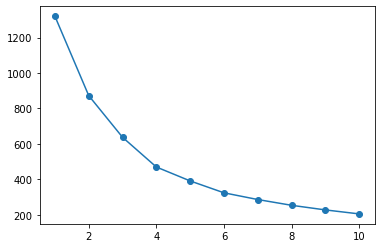

In [53]:
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse, marker="o")
plt.show()

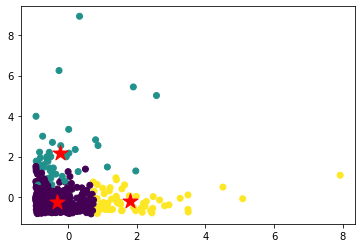

In [56]:
#ちょうど3つ目のところから緩やかになっているので3つが良さそう
#先程のコードのclusterを3にして処理を行う
model2 = KMeans(n_clusters=3, random_state=1)
model2.fit(X_std)

plt.scatter(X_std[:, 0], X_std[:, 1], c=model2.labels_)
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=250, marker="*", c='red')
plt.show()
#３つに別れた！！

In [62]:
#合計額の算出
df.sum()

Channel                 582
Region                 1119
Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

In [94]:
df.sum(axis=1)

0      34117
1      33271
2      36615
3      27385
4      46105
       ...  
435    73306
436    48376
437    77412
438    17838
439     7593
Length: 440, dtype: int64

In [89]:
X.sum()

Fresh      5280131
Grocery    3498562
Milk       2550357
dtype: int64

array([ 0.05293319, -0.04111489,  0.52356777])

# 【問題6: 分析結果のレポーティング】



既存店舗の売上構成から､市場がどのような環境にあるか、新たに店舗を出店する際､高い売上を実現するための機会となりうることや、レポーティングした結果からの提案を300~800文字前後で書いてください。
（卸売業の顧客データを用いて、教師なし学習手法を実装し､学習結果の解釈・可視化、施策提言まで行う）

# 分析報告テンプレート

#### 1. 提案の要約
##### レポートの要約を記述（100文字以内）

#### 2. 環境
##### 既存店舗の売上構成から､市場がどのような環境にあるかを記述（700文字以内）

#### 3. 機会
##### 新たに店舗を出店する際､高い売上を実現するための機会となりうることに関して記述（300文字以内）